In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from tqdm import tqdm

sys.path.append("..")
from modules.utils import paper_style
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from dtaidistance import dtw, dtw_visualisation, dtw_ndim, dtw_ndim_visualisation
from dtaidistance.dtw import warping_amount

paper_style()

from helper_fn import *

sys.path.append("..")

# current_dir = os.path.dirname(os.path.abspath(__file__))
current_dir = ""
relative_path = "../data"
path = os.path.join(current_dir, relative_path)
data_path = os.path.join(path, "test/")
data_drug_path = os.path.join(path, "test_drug/")
gt_path = os.path.join(path, "GT/")
gt_drug_path = os.path.join(path, "GT_drug/labels/")

drug = False

if drug:
    data_path_ = data_drug_path
    gt_path_ = gt_drug_path
else:
    data_path_ = data_path
    gt_path_ = gt_path

gt_tracks = []
taus = []
len_tracks = []

for i, fn in enumerate(os.listdir(gt_path_)):
    track = np.load(os.path.join(gt_path_, fn)).squeeze().T.astype(np.double)
    tau = np.linspace(0, 1, track.shape[0])
    gt_tracks.append(track)
    taus.append(tau)
    len_tracks.append(track.shape[0])

n_tracks = len(gt_tracks)
crossing_points_gt, idx_gt = find_crossing_points(taus, gt_tracks)

track_lengths = [track.shape[0] for track in gt_tracks]

modalities = ["bf", "h2b"]

# loading data

In [2]:
mod = "h2b"
head = "xtransformer"

tracks = get_data(data_path_, mod, head)

In [3]:
# get distance between tracks[0] and gt_tracks[0]

tr0 = tracks[0].astype(np.double)
gt0 = gt_tracks[0].astype(np.double)



xtransformer 0.98 9.78


(<Figure size 700x500 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

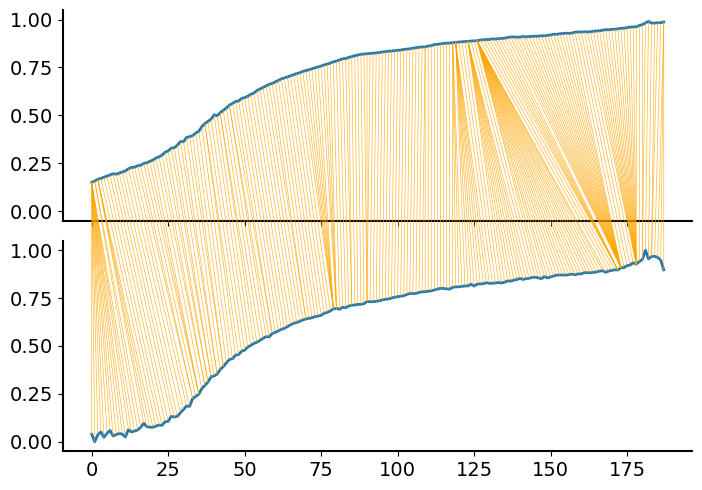

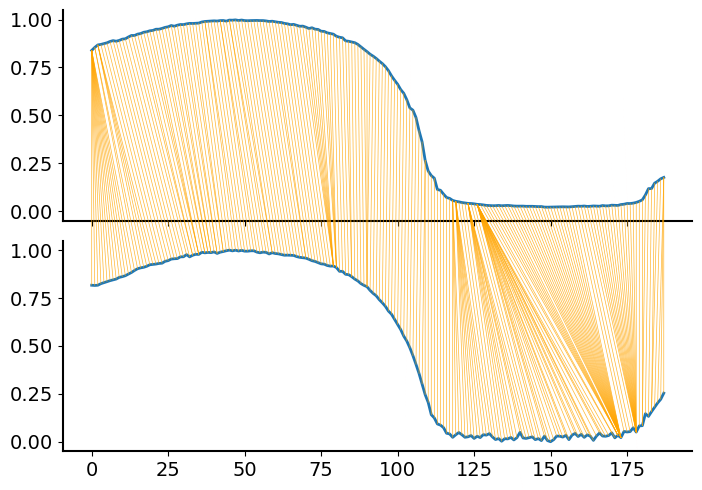

In [4]:
idx = np.random.randint(0, len(tracks))
tr0 = tracks[idx].astype(np.double)
gt0 = gt_tracks[idx].astype(np.double)
penalty = 0.

dist = dtw_ndim.distance(tr0, gt0, penalty=penalty)
dist10 = dtw_ndim.distance(10*tr0, 10*gt0, penalty=penalty)
print(f"{head} {dist:.2f} {dist10:.2f}")
path = dtw_ndim.warping_path(tr0, gt0, penalty=penalty)
path = np.array(path)
path

dtw_visualisation.plot_warping(tr0[:, 0], gt0[:, 0], path)
dtw_visualisation.plot_warping(tr0[:, 1], gt0[:, 1], path)

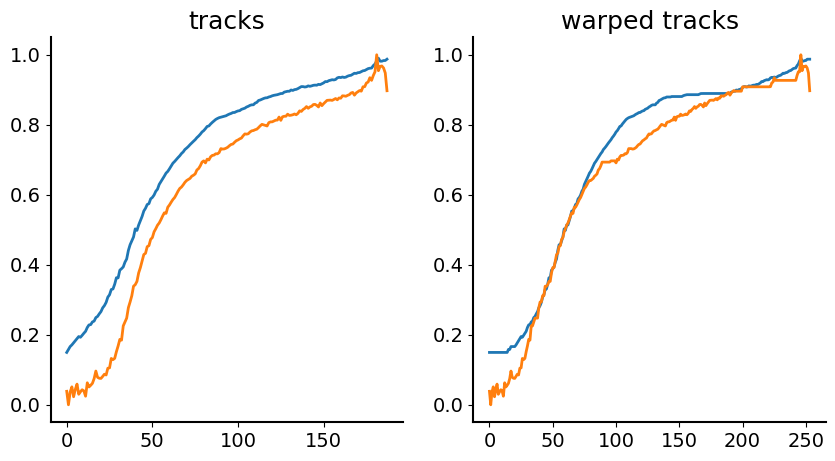

In [5]:
warped_tr0 = tr0[path[:,0]]
warped_gt = gt0[path[:,1]]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("tracks")
plt.plot(tr0[:, 0])
plt.plot(gt0[:, 0])

plt.subplot(1, 2, 2)
plt.title("warped tracks")
plt.plot(tr0[path[:,0], 0])
plt.plot(gt0[path[:,1], 0])
plt.show()

In [6]:
print(dist)
np.linalg.norm(tr0 - gt0 , axis=1).sum()

# get distance between tracks[0] and gt_tracks[0]

0.9783672833370048


19.112120469154814

# warping amount 


In [7]:
# help(dtw_visualisation)

warping amount 144 tr_len 188


(<Figure size 700x500 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

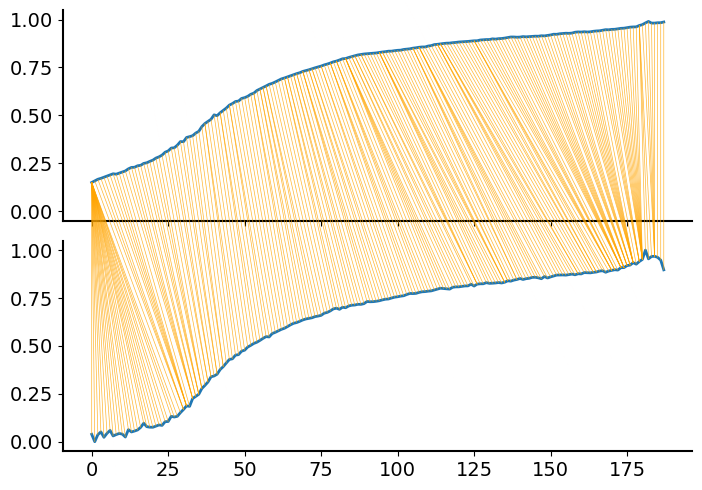

In [8]:
path_g = dtw.warping_path_fast(tr0[:, 0], gt0[:, 0], penalty=0)

tr_len = tr0.shape[0]
wa_g = dtw.warping_amount(path_g)
print(f"warping amount {wa_g} tr_len {tr_len}")

# visualize warping
dtw_visualisation.plot_warping(tr0[:, 0], gt0[:, 0], path_g)

In [9]:
dtwa_un = dtw_dist_loop(gt_tracks, tracks, penalty=0, len_normalize=False)
dtwa_un_g, dtwa_un_r = dtwa_un[:, 0], dtwa_un[:, 1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

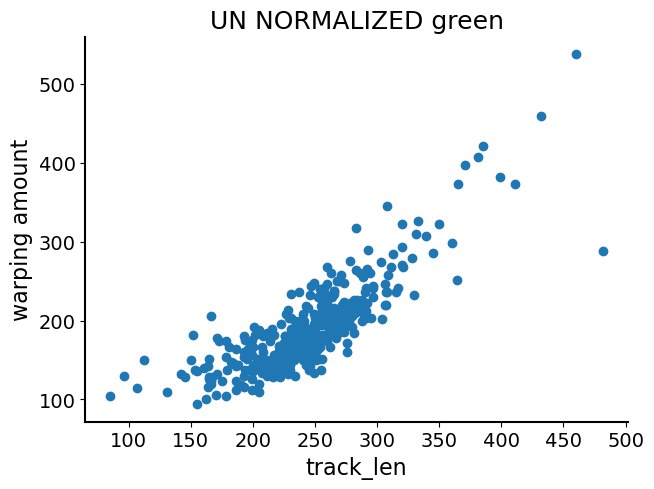

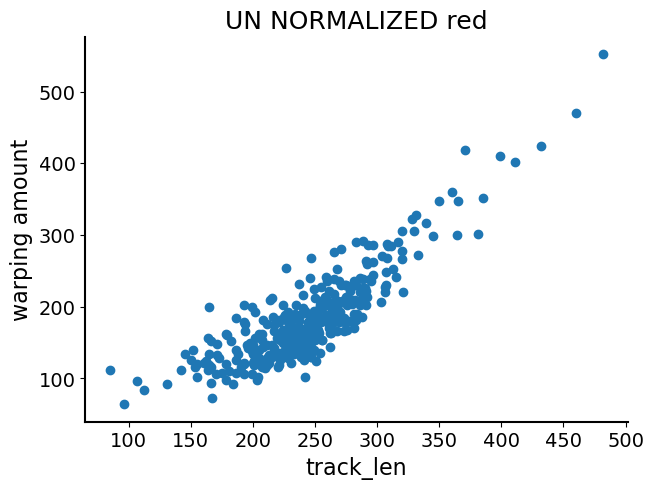

In [ ]:
plt.scatter(len_tracks, dtwa_un_g)
plt.title("UN NORMALIZED green")
plt.xlabel("track_len")
plt.ylabel("warping amount")
plt.show()

# same for red
plt.scatter(len_tracks, dtwa_un_r)
plt.title("UN NORMALIZED red")
plt.xlabel("track_len")
plt.ylabel("warping amount")
plt.show()

# normalized dtwa

In [10]:
dtwa = dtw_dist_loop(gt_tracks, tracks, penalty=0, len_normalize=True)
dtwa_g, dtwa_r = dtwa[:, 0], dtwa[:, 1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [11]:
plt.scatter(len_tracks, dtwa_g)
plt.title("NORMALIZED green")
plt.xlabel("track_len")
plt.ylabel("warping amount")
plt.show()

# same for red
plt.scatter(len_tracks, dtwa_r)
plt.title("NORMALIZED red")
plt.xlabel("track_len")
plt.ylabel("warping amount")
plt.show()

NameError: name 'dtwa_g' is not defined

In [12]:
# plot green and red against each other
plt.scatter(dtwa_g, dtwa_r)

plt.xlabel("dtw amount green")
plt.ylabel("dtw amount red")

NameError: name 'dtwa_g' is not defined

In [13]:
l1_metric_gr = mean_track_error(gt_tracks, tracks, av_channels=False)
l1_metric = l1_metric_gr.mean(axis=1)
dtwa_m = dtwa.mean(axis=1)

NameError: name 'dtwa' is not defined

NameError: name 'dtwa' is not defined

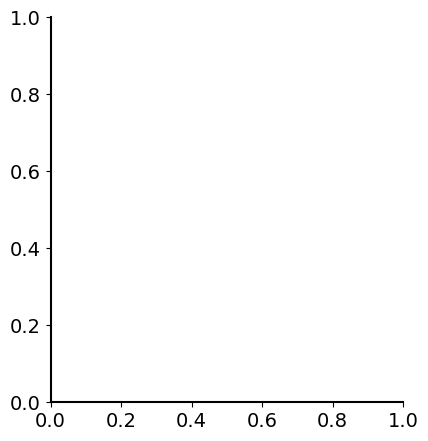

In [14]:
good_idx = 39
idx = np.random.randint(0, n_tracks)
idx = good_idx

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title(f"dtwa= {dtwa[idx, 0]:.2f} L1={l1_metric_gr[idx, 0]:.2f}")

plt.plot(tracks[idx][:, 0], color="red", label=head)
plt.plot(gt_tracks[idx][:, 0], color="black", label="GT")

plt.legend()

plt.subplot(1, 2, 2)
plt.title(f"dtwa = {dtwa[idx, 1]:.2f} L1={l1_metric_gr[idx, 1]:.2f}")

plt.plot(tracks[idx][:, 1], color="red", label=head)
plt.plot(gt_tracks[idx][:, 1], color="black", label="GT")

In [15]:
l1_metric.shape, dtwa_m.shape

plt.scatter(l1_metric, dtwa_m)
plt.xlabel("L1 metric")
plt.ylabel("DTWa metric")

NameError: name 'dtwa_m' is not defined

# stuff

In [19]:
dtw_dist = {}
penalty = 0.1

for head in heads:
    tracks = get_data(data_path_, mod, head)
    dist = dtw_dist_loop(gt_tracks, tracks, penalty=penalty, len_normalize=False)

    dtw_dist[head] = dist

In [24]:
for head in heads:
    dist = dtw_dist[head]
    print(f"{head} mean {dist.mean(axis=0):.2f} std {dist.std(axis=0):.2f}")

mlp mean 2.59 std 1.20
cnn mean 2.16 std 1.21
lstm mean 1.47 std 1.16
xtransformer-causal mean 1.55 std 0.96
mamba mean 1.43 std 0.95
xtransformer mean 1.16 std 0.61


mlp 4.43
cnn 3.97
lstm 3.90
xtransformer-causal 3.45
mamba 3.78
xtransformer 3.68


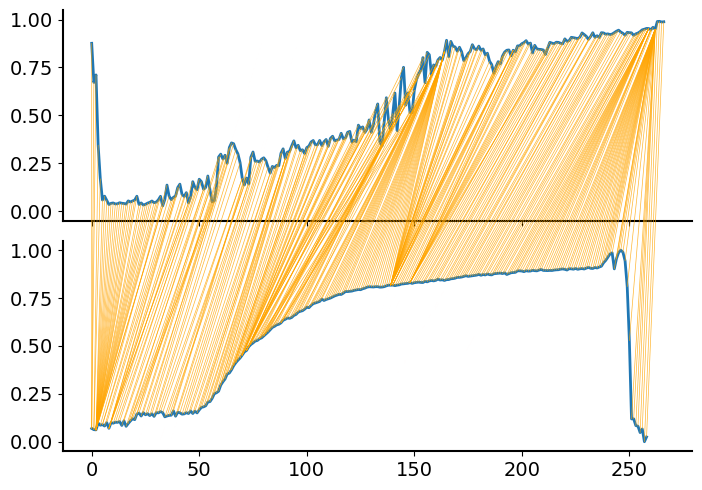

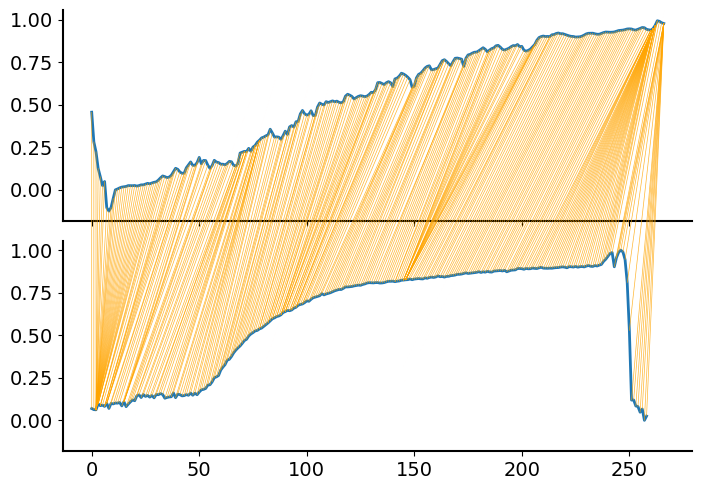

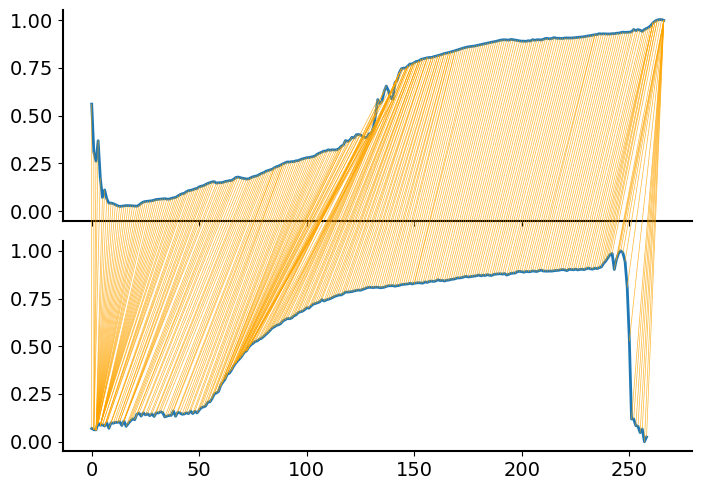

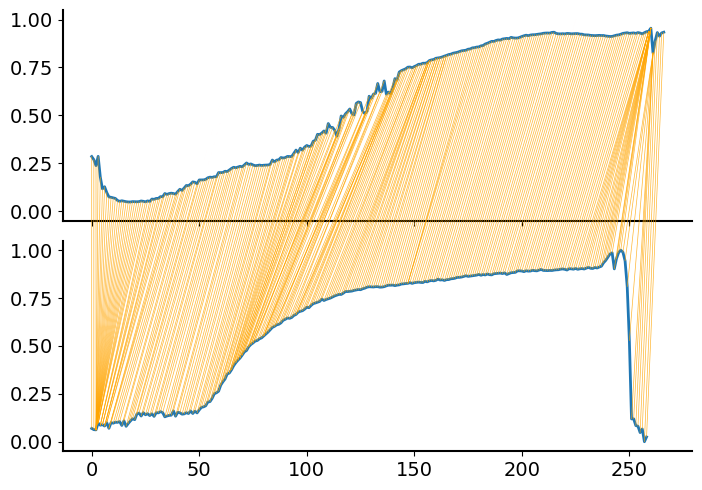

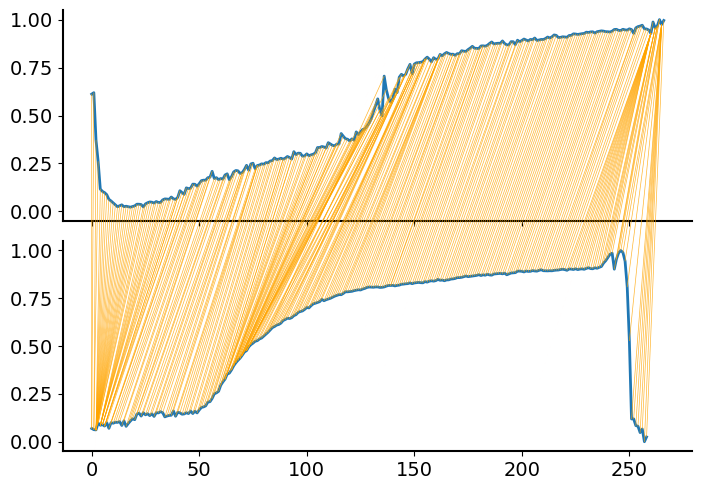

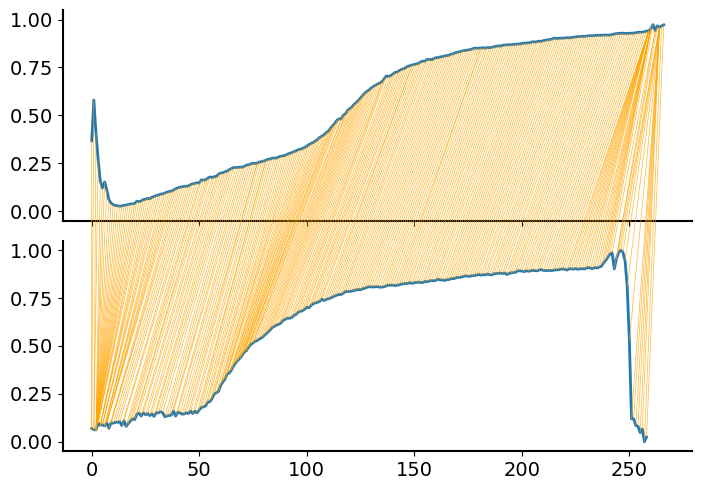

In [ ]:
penalty = 0.1
for head in heads:

    tracks = get_data(data_path_, mod, head)
    tr0 = tracks[0].astype(np.double)

    # kwargs=dict(penalty=penalty, inner_dist=MyDist)
    path = dtw_ndim.warping_path(tr0, gt0, penalty=penalty)
    dist = dtw_ndim.distance(tr0, gt0, penalty=penalty)
    print(f"{head} {dist:.2f}")

    

    dtw_visualisation.plot_warping(tr0[:, 0], gt0[:, 0], path)
